In [7]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('medical2.jpg', cv2.IMREAD_GRAYSCALE)

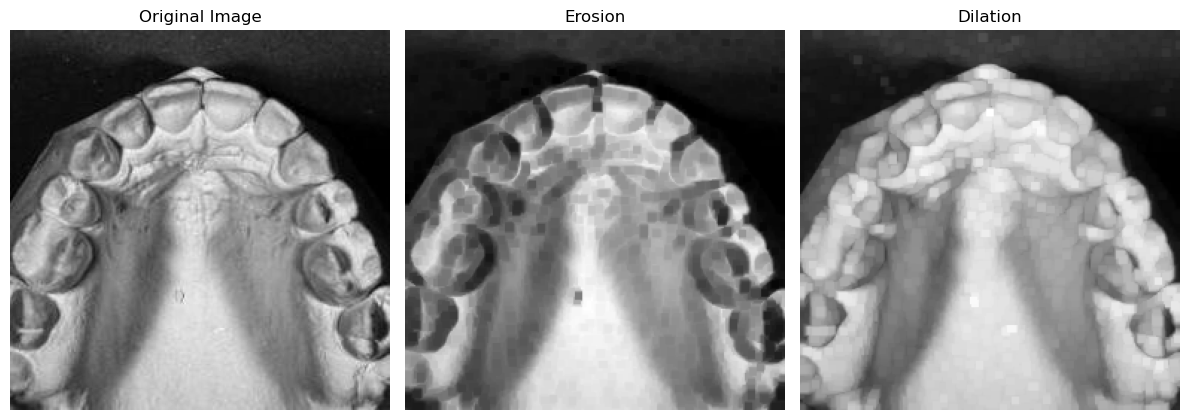

In [8]:

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image.")
else:
    # Define the structuring element (kernel) for erosion and dilation
    kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size as needed

    # Apply erosion and dilation
    erosion = cv2.erode(image, kernel, iterations=1)
    dilation = cv2.dilate(image, kernel, iterations=1)

    # Display the original and processed images using Matplotlib
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(erosion, cmap='gray')
    plt.title('Erosion')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(dilation, cmap='gray')
    plt.title('Dilation')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


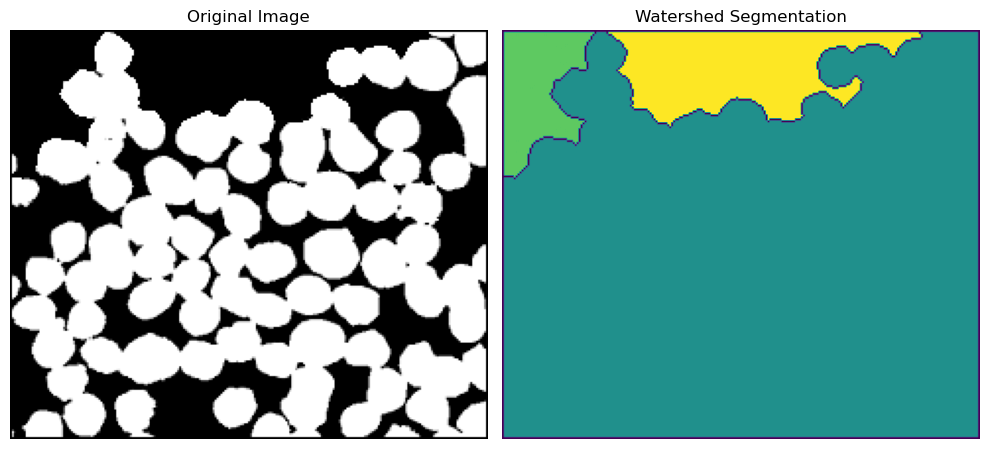

In [15]:
# Check if the image is loaded successfully
image = cv2.imread('images.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Could not read the image.")
else:
    # Apply thresholding to obtain a binary image
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Morphological operations to remove noise and prepare markers for watershed
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labelling for watershed
    _, markers = cv2.connectedComponents(sure_fg)
    markers += 1
    markers[unknown == 255] = 0

    # Apply watershed algorithm
    markers = cv2.watershed(cv2.cvtColor(cv2.imread('images.png'), cv2.COLOR_BGR2RGB), markers.astype(np.int32))
    image[markers == -1] = 0  # Mark watershed boundaries

    # Display the original image and watershed result
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(markers, cmap='viridis')
    plt.title('Watershed Segmentation')
    plt.axis('off')

    plt.tight_layout()
    plt.show()